In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("spotify_tracks.csv")
df.columns

Index(['id', 'name', 'genre', 'artists', 'album', 'popularity', 'duration_ms',
       'explicit'],
      dtype='object')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17932\2462462362.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=df["genre"], y=df["popularity"], cmap='viridis')


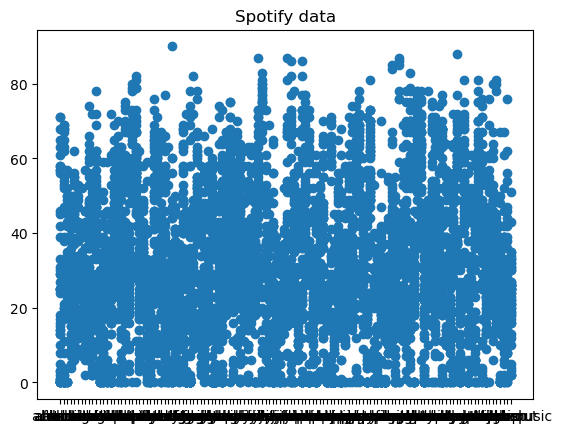

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x=df["genre"], y=df["popularity"], cmap='viridis')
plt.title("Spotify data")
plt.show()

In [3]:
df.isnull().sum()

id             0
name           0
genre          0
artists        0
album          0
popularity     0
duration_ms    0
explicit       0
dtype: int64

In [4]:
# feature scaling

# For multiple numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = ['duration_ms', 'popularity']  # Add your actual numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [5]:
#train_test_split

from sklearn.model_selection import train_test_split

X = df.drop('popularity', axis = 1)
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Identify numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['duration_ms']
Categorical columns: ['id', 'name', 'genre', 'artists', 'album']


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Numerical pipeline (with median imputation and scaling)
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline (with most_frequent imputation and one-hot encoding)
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Process data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.5156376524687242
R² Score: 0.48980738958342307


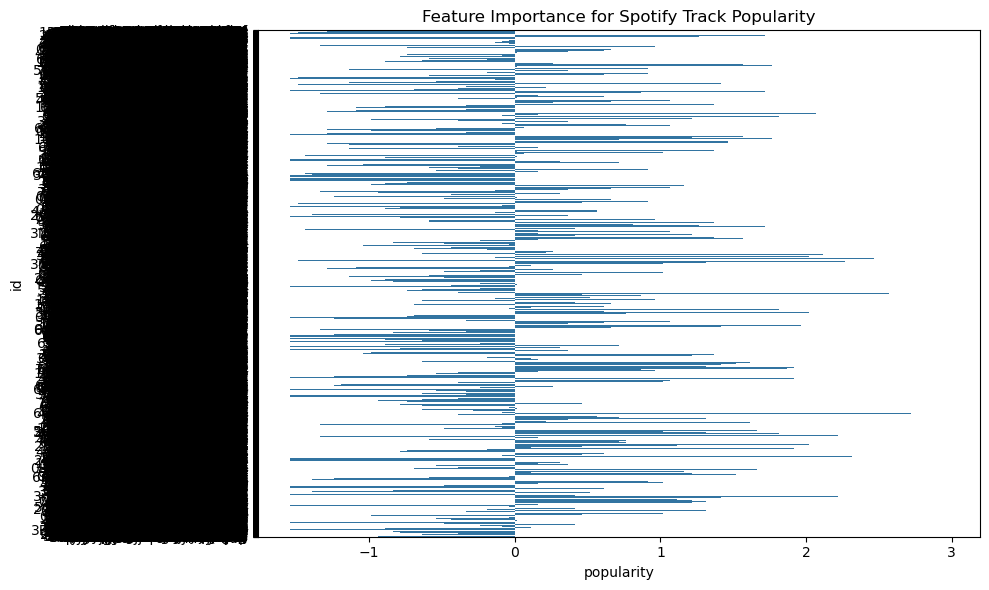

In [9]:
import seaborn as sns
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='popularity', y='id', data=df)
plt.title('Feature Importance for Spotify Track Popularity')
plt.tight_layout()
plt.show()

In [10]:
df.info

<bound method DataFrame.info of                           id                                           name  \
0     7kr3xZk4yb3YSZ4VFtg2Qt                                       Acoustic   
1     1kJygfS4eoVziBBI93MSYp                                       Acoustic   
2     6lynns69p4zTCRxmmiSY1x                  Here Comes the Sun - Acoustic   
3     1RC9slv335IfLce5vt9KTW                                    Acoustic #3   
4     5o9L8xBuILoVjLECSBi7Vo  My Love Mine All Mine - Acoustic Instrumental   
...                      ...                                            ...   
6295  4uveHSzaz8YEbTF9j6QlCI                             Voyage to Atlantis   
6296  4u15cjyziW2Ewn5Ek3082l                                       L'Oiseau   
6297  56pHPaTeX2O9aVmTFYS8hV                                   The Daintree   
6298  6Ldyc5TsR4kaUsuHKcB2AD                         The Sorcerers Symphony   
6299  3ry0f8ybk8upUBIk8unvmF                                Fiore d'inverno   

            genre  